**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

A variável uniforme utilizada nas questões 1, 2, 3, 4 é definida a seguir

**$1.$ Considerando que $N=20$ amostras de $X$ são selecionadas para calcular a média $\bar{X}$, plote a pdf de $\bar{X}$**

In [2]:
np.random.seed(42) # para fins de reprodutibilidade
a, b = [1.0, 3.0] # parâmetros a e b da distribuição uniforme
X = np.random.uniform(low=a, high=b, size=1000)
X_sample = np.random.choice(X, size=20) # escolha das 20 amostras
std_a = np.std(X)/np.sqrt(20) # desvio padrão da amostra

In [3]:
xis = np.linspace(1.0,3.0,100)
# calculo da pdf
pdf = [norm.pdf(xi, loc=np.mean(X_sample), scale=std_a) for xi in xis]

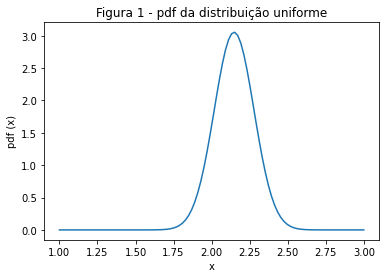

In [4]:
plt.plot(xis, pdf)
plt.title("Figura 1 - pdf da distribuição uniforme")
plt.xlabel("x")
plt.ylabel("pdf (x)");

**$2.$ Usando a pdf do item $1$, escolha um nível de confiança ($1$ − $\alpha$) para delimitar as regiões de aceitação e regiões críticas, mostrando-as no gráfico da pdf de $\bar{X}$**

O nível de confiança utilizado será de $97\%$, ou seja, $\alpha=0.03$

In [5]:
def CI(muX, sigma, n, alpha=0.05):
    """
    Calcula o intervalo de confiância de uma distribuição normal
    """
    zalpha_2  = norm.ppf(alpha/2)    
    ci_d = muX - zalpha_2*sigma/np.sqrt(n) # limite superior    
    ci_l = muX + zalpha_2*sigma/np.sqrt(n) # limite inferior
    return ci_l, ci_d

In [6]:
ci = CI(muX=np.mean(X_sample), sigma=np.std(X), alpha=0.03, n=20)
ci

(1.8645124830445754, 2.4312639619324594)

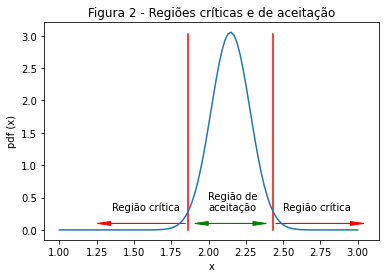

In [7]:
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
one_x12, one_y12 = [ci[0], ci[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [ci[1], ci[1]], [lim_inf, lim_sup-0.02]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(xis, pdf)
# regiões críticas
ax.arrow(ci[0]-0.02, 0.1, dx=-0.5, dy=0.0, head_width = 0.06, ec='red', color='red')
ax.arrow(ci[1]+0.02, 0.1, dx=0.5, dy=0.0, head_width = 0.06, ec='red', color='red')
# região de aceitação
ax.arrow(np.mean(ci), 0.1, dx=-.15, dy=0.0, head_width=0.06, ec='green', color='green')
ax.arrow(np.mean(ci), 0.1, dx=.15, dy=0.0, head_width=0.06, ec='green', color='green')
ax.text(np.mean(ci)-0.15, 0.3, s="Região de\naceitação")
ax.text(1.35, 0.3, s="Região crítica")
ax.text(2.5, 0.3, s="Região crítica")
ax.set_title("Figura 2 - Regiões críticas e de aceitação")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

A Figura $2$ mostra as regiões críticas e de aceitação da pdf de $20$ amostras de uma distribuição uniforme. Para essas amostras, $1.86 \le \bar{X} \le 2.43$

**$3.$ Usando as definições da atividade $2$, sugira um teste de hipótese para a média de modo que se tenha probabilidade de erro tipo I igual a $\alpha$ e probabilidade de erro tipo II $\beta = 0.1$. Repita para $\beta = 0.5$**

In [8]:
muS = np.mean(X_sample)
muS

2.1478882224885174

O $\alpha$ utilizado no cálculo da região crítica já define a probabilade do erro tipo I, é esperado que com a hipótese nula igual à média da amostra, a probabilidade do erro tipo I será igual $\alpha$, assim podemos definir o seguinte teste de hipótese:

$H_0: \mu=2.148$

$H_1: \mu \neq 2.148$

In [9]:
z1 = (ci[0]-muS)/std_a
z2 = (ci[1]-muS)/std_a
z1, z2

(-2.1700903775845615, 2.1700903775845615)

Primeiramente obtemos o valor normalizado ($z$) onde a probabilidade equivaloe a $0.3/2$

In [10]:
# pz do limite inferior p/ que o alpha seja igual a 0.03 (0.015 de um lado e de outro)
pz = norm.ppf(0.015)
pz

-2.1700903775845606

A partir desse valor, calculamos a região crítica a partir da média definida na hipótese.

In [77]:
novo_ci = [0,0]
novoZ = -2.17
novo_ci[0] = novoZ*std_a+muS.round(3)
novo_ci[1] = -novoZ*std_a+muS.round(3)
novo_ci

md(f"Para que a probabilidade do Erro tipo I seja igual a alpha (valor definido para intervalo de confiança), $\mu < {novo_ci[0].round(2)}$ e $\mu > {novo_ci[1].round(2)}$")

Para que a probabilidade do Erro tipo I seja igual a alpha (valor definido para intervalo de confiança), $\mu < 1.86$ e $\mu > 2.43$

Logo, mostramos que os valores onde a probabilidade do erro tipo I ser igual ao $\alpha$ do intervalo de confiança são aqueles que caem na região crítica da Figura $2$.

Para obter $\beta = 0.1$, considere uma distribuição com média igual ao intervalo superior da primeira distribuição definida anteriormente ($2.43$):

In [82]:
muXb = 2.43

$\beta = P(2.99 \le \bar{X} \le 3.54)$, quando $\mu = 3.26$

A probabilidade do erro tipo II corresponde a àrea sob apenas um dos lados da distribuição utilizada para calcular o erro. Assim, primeiro obtemos o valor de $z$ que corresponde à probabilidade desejada de $0.1$:

In [83]:
pz_beta = norm.ppf(0.1)

Com o $z$ calculado, obtemos a região crítica da distribuição:

In [84]:
novo_ci_b1 = [0,0]
novoZ_b1 = pz_beta
novo_ci_b1[0] = novoZ_b1*std_a + muXb
novo_ci_b1[1] = -novoZ_b1*std_a + muXb
novo_ci_b1

[2.2626518442397954, 2.597348155760205]

Para que a probabilidade do Erro tipo II seja igual a $0.1$, $2.14 \leq \bar{X} \leq 2.47$, quando $\mu=2.43$, como mostra a Figura $3$ a seguir.

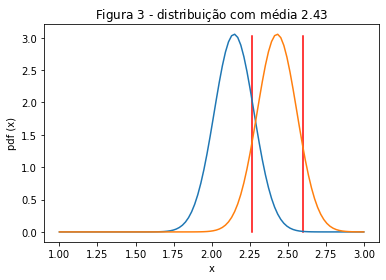

In [85]:
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
one_x12, one_y12 = [novo_ci_b1[0], novo_ci_b1[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [novo_ci_b1[1], novo_ci_b1[1]], [lim_inf, lim_sup-0.02]
pdf_2 = [norm.pdf(xi, loc=muXb, scale=std_a) for xi in xis]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(xis, pdf)
ax.plot(xis, pdf_2)
ax.set_title("Figura 3 - Região crítica da distribuição uniforme \n com média $2.43$")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

Uma alternativa para aumentar o Erro II é diminuir o Erro I. Isso pode ser feito aumentando a região de aceitação, em outras palavras, reduzindo o valor de $\alpha$

In [90]:
novo_ci2 = [0,0]
pz_a2 = norm.ppf(0.015)
novo_ci2[0] = pz_a2*std_a+muS.round(3)
novo_ci2[1] = -pz_a2*std_a+muS.round(3)
novo_ci2

[1.8646242605560581, 2.431375739443942]

Considerando a região de aceitação maior da primeira distribuição, podemos variar a média da segunda até encontrar uma região crítica em que o erro tipo II seja igual a $0.5$, que é feita no código a seguir. A execução retorna que a média da distribuição para a probabilidade desejada deve ser de $\approx2.49$

In [93]:
possiveis_mu = np.linspace(2.46,2.59,100)
for pmu in possiveis_mu:
    rg_b2 = CI(muX=pmu, sigma=std_a, alpha=0.03, n=20)
    z1 = (rg_b2[0]-novo_ci2[1])/std_a
    pbeta = norm.cdf(z1)
    if (np.isclose([0.5], [np.round(pbeta,2)])):
        print(pmu)
        break

2.494141414141414


In [98]:
rg_b2

(2.430776672484322, 2.557506155798506)

A Figura $4$ mostra a região crítica (em roxo) da distribuição sugerida para o teste de hipótese do erro tipo II. Assim, para que a probabilidade do Erro tipo II seja igual a $0.5$, $2.43 \leq \bar{X} \leq 2.55$, quando $\mu=2.43$, como mostra a Figura $4$ a seguir.

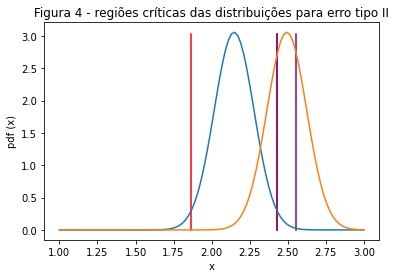

In [97]:
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
o_x12, o_y12 = [novo_ci2[0], novo_ci2[0]], [lim_inf, lim_sup-0.02]
t_x12, t_y12 = [novo_ci2[1], novo_ci2[1]], [lim_inf, lim_sup-0.02]
one_x12, one_y12 = [rg_b2[0], rg_b2[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [rg_b2[1], rg_b2[1]], [lim_inf, lim_sup-0.02]
ax.plot(o_x12, o_y12, t_x12, t_y12, color='red')
ax.plot(one_x12, one_y12, two_x12, two_y12, color='purple')
ax.plot(xis, pdf)
pdf_2 = [norm.pdf(xi, loc=pmu, scale=std_a) for xi in xis]
ax.plot(xis, pdf_2)
ax.set_title("Figura 4 - regiões críticas das distribuições para erro tipo II")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

**$4.$ Altere $N$ para aumentar o poder de teste de $50\%$ para $75\%$ ($\beta = 0.5$ para $\beta = 0.25$). Ilustre a solução graficamente na pdf.**

In [99]:
pmu

2.494141414141414

Para aumentar o poder do teste, podemos aumentar o valor de $n$ até atingir o beta desejado. O código a seguir faz isso, e indica que considerando $n=73$, o poder do teste é aumentado para $75\%$

In [107]:
for n in range(20, 100):
    novo_stda = np.std(X)/np.sqrt(n)
    rg_bn = CI(muX=pmu, sigma=novo_stda, alpha=0.03, n=n)
    z1 = (rg_bn[0]-novo_ci2[1])/novo_stda
    pbeta = norm.cdf(z1)
    if (np.isclose([0.75],[np.round(pbeta,2)])):
        print(n)
        break

73


In [109]:
rg_bn

(2.47678121094769, 2.511501617335138)

2.430776672484322, 2.557506155798506

A Figura $5$ a seguir mostra a região crítica considerando um número maior de amostras. A região crítica, nesse caso, varia pouco em relação a anterior. De $[2.43, 2.55]$ para $[2.47, 2.51]$.

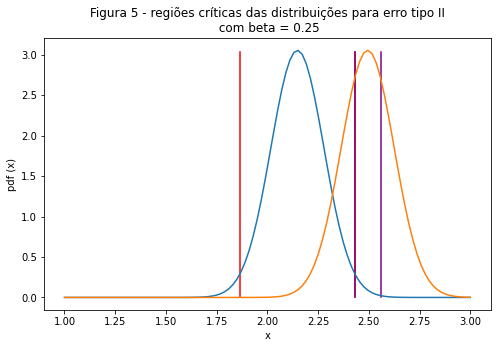

In [114]:
fig, ax = plt.subplots(figsize=(8,5))
lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
o_x12, o_y12 = [novo_ci2[0], novo_ci2[0]], [lim_inf, lim_sup-0.02]
t_x12, t_y12 = [novo_ci2[1], novo_ci2[1]], [lim_inf, lim_sup-0.02]
one_x12, one_y12 = [rg_b2[0], rg_b2[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [rg_b2[1], rg_b2[1]], [lim_inf, lim_sup-0.02]
ax.plot(o_x12, o_y12, t_x12, t_y12, color='red')
ax.plot(one_x12, one_y12, two_x12, two_y12, color='purple')
ax.plot(xis, pdf)
pdf_2 = [norm.pdf(xi, loc=pmu, scale=std_a) for xi in xis]
ax.plot(xis, pdf_2)
ax.set_title("Figura 5 - regiões críticas das distribuições para erro tipo II\n com beta = 0.25")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

**$5.$ Sejam os dados $X$ gerados na atividade $1$ do EPC6: cálculo de $50$ médias usando $20$ amostras selecionadas aleatoriamente de $X$. Use o teste z (ztest) para verificar se a variável aleatória $\bar{X}$ tem distribuição normal com a média e desvio padrão conhecidos da população $X$. Interprete as saídas do teste: h ($0$ ou $1$), valor-p, CI, zval (estatística de teste), e mostre graficamente estas informações na pdf e complemente com a função normplot**

In [11]:
np.random.seed(42)
medias = [np.random.choice(X, size=20).mean() for _ in range(50)]

In [12]:
np.mean(medias), np.std(medias)

(1.9765319532997478, 0.1270921704871447)

Para este teste temos duas hipóteses:

$H_0$: a distribuição das médias de $X$ é normal, com um nível de significância de $5\%$ ($\alpha=0.05$)

$H_1$: a distribuição de $X$ não é normal


OBS: A função do Python que calcula o ztest não retorna os parâmetros solicitados, então fiz este último cálculo no matlab. O código pode ser visto na figura

![](matlab.png)

Pelas saídas do zteste, percebe-se que não conseguimos rejeitar a hipótese nula, já que h=$0$. Além disso, o valor-p = $1$, como sendo uma probabilidade, garante a certeza da validade da hipótese nula. Ou seja, temos $100\%$ de certeza de que a distribuição é normal. O intervalo de confiança de [1.9413, 2.0118] nos diz que a distribuição das $50$ médias das amostras será normal quando $1.9413 \leq \bar{X} \leq 2.0118$.

In [13]:
ci_ztest = [1.9413, 2.0118]
pdf_medias = [norm.pdf(xi, loc=1.9765319532997478, scale=0.1270921704871447) for xi in xis]

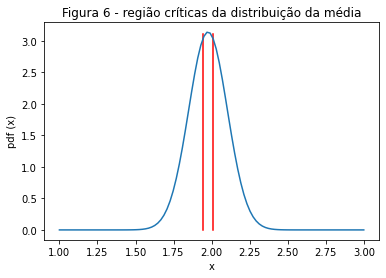

In [14]:
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf_medias), np.max(pdf_medias)]
o_x12, o_y12 = [ci_ztest[0], ci_ztest[0]], [lim_inf, lim_sup-0.02]
t_x12, t_y12 = [ci_ztest[1], ci_ztest[1]], [lim_inf, lim_sup-0.02]
ax.plot(o_x12, o_y12, t_x12, t_y12, color='red')
ax.plot(xis, pdf_medias)
ax.set_title("Figura 6 - região críticas da distribuição da média")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

In [16]:
import statsmodels.api as sm

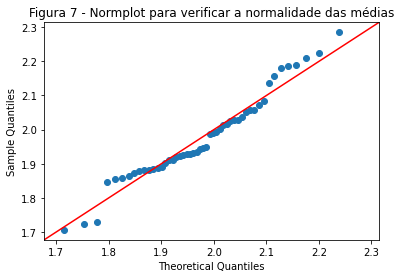

In [18]:
fig, ax = plt.subplots()
sm.qqplot(ax=ax, data=np.array(medias), loc=np.mean(medias), scale=np.std(medias), line='45')
plt.title("Figura 7 - Normplot para verificar a normalidade das médias")
plt.show()